# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


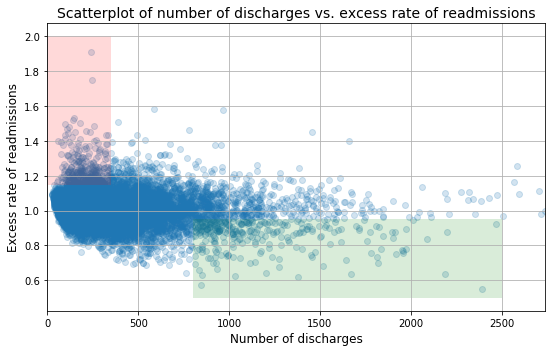

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<div class="span5 alert alert-info">
<h3>Answers - Critique Part</h3>

A. Do you agree with the above analysis and recommendations? Why or why not?


-----
Initial observations based on the plot above
+ "Overall, rate of readmissions is trending down with increasing number of discharges"

 The data is not cleaned properly. First of all, the definition of "excess" readmission rate is readmission rates that are greater than 1. However, the column is already labelled "Excess Readmission Rate", and it has observations with numbers less than 1, which is very confusing. Changed this column name to "Readmission Rate".

Moreover, there is another point: by definition in the header, excess readmisions are only measured for readmissions for heart attack, heart failure, and pneumonia. However, in the preliminary study, other areas like knee-hip surgery etc. aren't filtered out. Starting analysis without clearly understanding the problem and without cleaning the dataset properly will result in mistakes.

When the dataset labelled "cleaned" in the example is cleaned, the rate of excess readmissions can be seen to be trending down with increasing number of discharges. The pearson coefficient(r) is negative with uncleaned data and it is positive with cleaned dataset, if we assume excess ratio is readmission rate > 1, and filter out values less than 1. The sign of r show if there is negative of positive correlation. So, the THE FIRST ASSERTION IS NOT TRUE, if filtered according to readmission rate >1. If not it is TRUE, but the correlation is not very strong.


+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
Taking only the red shaded area to consideration and is not appropriate. There are low readmission rates less than 1 for hospitals with discharge values less than 300. This approach is wrong.


+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

The green shaded area is totally wrong, even if the results were absolutely true. There are values below 1, as well as higher values, such as 1.4, right above green area. Taking only one portion of values for hospital discahrge numbers result in misinterpretations. Here, it would be much better to draw a vertical line, rather than drawing a rectangle.

----
B. Statistics

+ "In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"

If excess readmission rate is defined as readmission rate greater than 1, this number should have been 1.023 and 598 entries are greater than 1, and it makes 66%.

----
+ "In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"

No, the readmission rate is 0.999 and excess readmission rate is %49.

C.
+ "There is a significant correlation between hospital capacity (number of discharges) and readmission rates."

There is a weak correlation between hospital capacity and readmission rates which is not negligible.

+ "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions."

There is no proof for this theory. The underlying reason might be something else.

D.
+ "Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation."

There is no evidence to support this "300" number. The number seems to be very arbitrary. 

+ "Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges."

Too few data to support this information.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
df=clean_hospital_read_df.drop(clean_hospital_read_df["Expected Readmission Rate"][clean_hospital_read_df["Expected Readmission Rate"].notnull()==False].index)

In [6]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
#r=pearson_r(data.yearsexp, data.call)

# Print the result
#print(r)


In [8]:
df1=df[df["Excess Readmission Ratio"]>=0]
df1.reset_index(inplace=True)
df1=df1.drop('index', axis='columns')

In [9]:
df1['Measure Name'].unique()  #it seems like some of the data is irrelevant 'READM-30-HIP-KNEE-HRRP' 'READM-30-COPD-HRRP'
df2=df1[df1['Measure Name'].isin(['READM-30-HIP-KNEE-HRRP','READM-30-COPD-HRRP'])==False]
df2.rename(columns={"Excess Readmission Ratio":"Readmission Ratio"}, inplace=True)

In [24]:
total_1000=df2[(df2['Number of Discharges']>1000)&(df2['Readmission Ratio']>0)]['Readmission Ratio'].count()
excess_1000=df2[(df2['Number of Discharges']>1000)&(df2['Readmission Ratio']>1)]['Readmission Ratio'].count()
#is mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1?
mean_1000=df2[df2['Number of Discharges']>1000]['Readmission Ratio'].mean()
#130/265

total_100=df2[(df2['Number of Discharges']<100)&(df2['Readmission Ratio']>0)]['Readmission Ratio'].count()
excess_100=df2[(df2['Number of Discharges']<100)&(df2['Readmission Ratio']>1)]['Readmission Ratio'].count()
#is mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1?
mean_100=df2[df2['Number of Discharges']<100]['Readmission Ratio'].mean()
#130/265
print('excess rate for greater than 1000 is:',excess_1000/total_1000)
print('excess rate for less than 100 is:',excess_100/total_100)
print('mean reaadmission rate for greater than 1000 is:',mean_1000)
print('mean reaadmission rate for greater than 100 is:',mean_100)

excess rate for greater than 1000 is: 0.49056603773584906
excess rate for less than 100 is: 0.6637069922308546
mean reaadmission rate for greater than 1000 is: 0.9996483018867921
mean reaadmission rate for greater than 100 is: 1.023533629300777


In [25]:
r=pearson_r(df2["Readmission Ratio"], df2["Number of Discharges"])
r

-0.03816676781116274

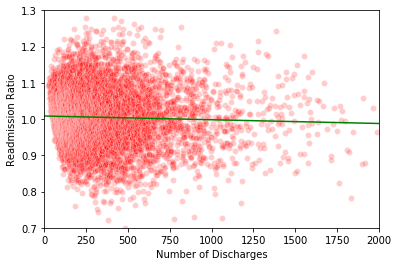

In [26]:
g=sns.scatterplot(data=df2,x='Number of Discharges',y="Readmission Ratio",norm=False,color='red',alpha=0.2)
g.axes.set_ylim(0.7,1.3)
g.axes.set_xlim(0,2000)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
a,b=np.polyfit(df2["Number of Discharges"],df2["Readmission Ratio"],1)
a,b
x = np.array([0,3900])
y=a*x+b
plt.plot(x,y, color="green")
#plt.scatter(df2["Number of Discharges"][df2["Number of Discharges"]<2500],df2["Excess Readmission Ratio"][df2["Number of Discharges"]<2500], alpha=0.3)
plt.margins(tight=True)


In [27]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates


<div class="span5 alert alert-info">
<h3>Answers</h3>

A. See criticism about provided solution above



B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Setup an appropriate hypothesis test.
Compute and report the observed significance value (or p-value).
Report statistical significance for  α  = .01.
Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

-----

Proposal:
+ The dataset provided needs to be redefined according to "Excess Readmission Ratio" definition of Healthcare system officials. Confusion should be prevented.
+ The dataset fails to provide strong correlation for readmission rates. More parameters could be researched, or added to the database if readily available to find another variable with a stronger correlation.
+ Hypothesis: The hospital discharge number has no effect on readmission rate, and having smaller readmission rates for big hospitals (number of discharge greater than 1000) is just a coincidence. This is my null hypothesis. Alternative hypothesis is: hospital discharge numbers effect readmission rates. In order to test the null hypothesis, I set up a bootstrap sample and create a distribution curve, and try to see if readmission rates of hospitals with 1000 discharge number or higher are probabalistically achieavable. The p value I found was close to 0, and since it is below our statistical significance number of 0.01, we reject the null hypothesis. I would recommend the customer to introduce new variables to the dataset that could provide stronger correlations and better insights even though the hypothesis testing proves the higher the number of discharges, the lower the readmission rates will be.
+ Please see correlation heatmap and reformatted scatterplot.





p =  0.0
1.0049359778348397
1.0011039870252738


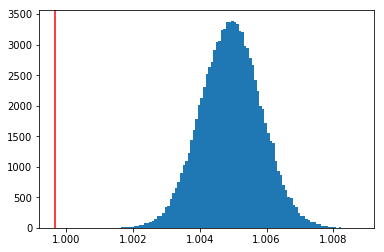

In [28]:
# Hypothesis testing
rate=df2['Readmission Ratio']


# Take bootstrap replicates
bst = draw_bs_reps(rate, np.mean, 100000)

# Compute fraction of replicates
p = np.sum(bst <= (df2[df2['Number of Discharges']>1000]['Readmission Ratio'].mean())) / 100000

# Print the p-value
print('p = ', p)
print(rate.mean())
print(bst.min())
plt.hist(bst, bins=100)
plt.axvline((df2[df2['Number of Discharges']>1000]['Readmission Ratio'].mean()), color='red')

In [29]:
(df2[df2['Number of Discharges']>1000]['Readmission Ratio'].mean())

0.9996483018867921

In [30]:
pearson_r(df2["Readmission Ratio"], df2["Number of Discharges"])

-0.03816676781116274

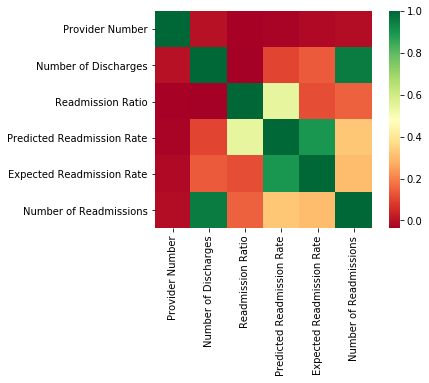

In [32]:
df2=df2.drop('Footnote', axis='columns')
sns.heatmap(df2.corr(), square=True, cmap='RdYlGn')

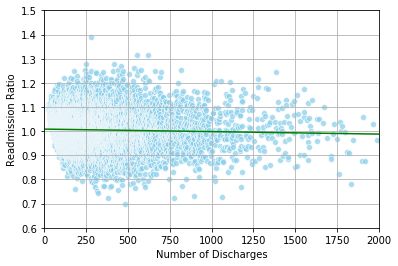

In [33]:
g=sns.scatterplot(data=df2[df2["Number of Discharges"]<3000],x='Number of Discharges',y="Readmission Ratio",color='skyblue',norm=False,alpha=0.7)
g.axes.set_ylim(0.6,1.5)
g.axes.set_xlim(0,2000)
a,b=np.polyfit(df2["Number of Discharges"],df2["Readmission Ratio"],1)
a,b
g.grid(axis="both")
x = np.array([0,3900])
y=a*x+b
plt.plot(x,y, color="green")
#plt.scatter(df2["Number of Discharges"][df2["Number of Discharges"]<2500],df2["Excess Readmission Ratio"][df2["Number of Discharges"]<2500], alpha=0.3)
plt.margins(tight=True)